#Exercise 4: Multiplication, Training Issues, RNNs and Encoder-Decoder Architecture.

You can work in pairs or individually.

Upload your solution on OLAT before the deadline: **Friday, 13th December 2024,  at 12:15**.

If you have any questions, post them on OLAT.

**Submission Format**
- Filename: **olatnameStudent1_olatnameStudent2_ml_ex4.ipynb**
- Include the names of **all team members** in the block below.
- If you have multiple files, place your file(s) in a compressed folder (zip).


Good luck! :)

# Task 1. More Multiplication

Solve this task manually (insert an image or use a text cell), and verify your answers using python. If the operation is not possible, explain why in your own words (don't just copy paste the error message). Write your code in the assigned code cell below, and leave explanations either as comments in the code cell, or add a separate text cell.

a) Determine the Hadamard product (elementwise multiplication) if possible

i) $$ \begin{bmatrix} 4&7\\ -3&7 \\ 23&-8 \end{bmatrix} \odot \begin{bmatrix} 3&5\\ -2&25 \\ -1&0 \end{bmatrix}$$

ii) $$ \begin{bmatrix} 5&3\\ -7&27 \\ 33&-8 \end{bmatrix} \odot \begin{bmatrix} 6&7\\ -3&13\end{bmatrix}$$

b) Perform matrix multiplication if possible

$$ \begin{bmatrix} 4&9&1\\ -2&6&4 \\ 3&1&3 \end{bmatrix} \cdot \begin{bmatrix} 3&6&44&40\\ 1&3&1&17 \\ -10&0&0&1 \end{bmatrix}$$

c) Calculate if possible

$$( \begin{bmatrix} 7&7\\ -2&37 \\ 3&-5 \end{bmatrix} \odot \begin{bmatrix} 2&5\\ -2&0 \\ 3&-2 \end{bmatrix}) \cdot \begin{bmatrix} 3&1\\ 3&2 \end{bmatrix}$$

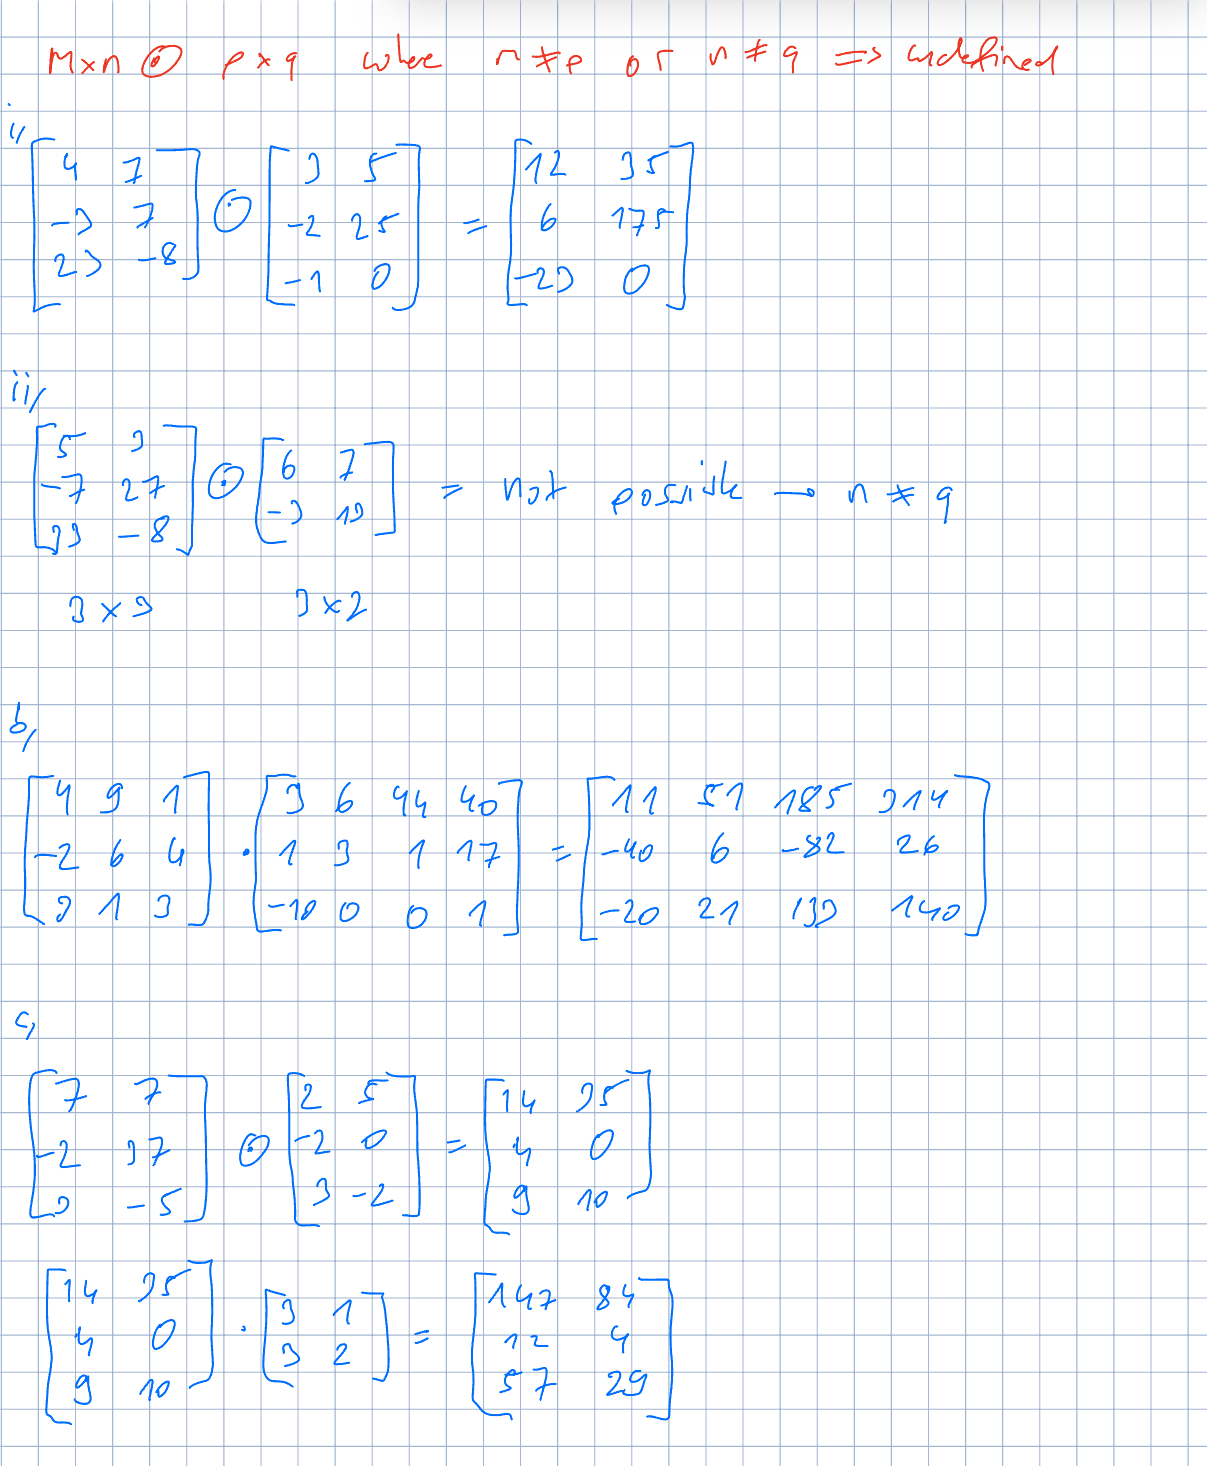

In [ ]:
# code to verify your calculations
def matrix_multiply(matrix1, matrix2):
    # Check if the matrices can be multiplied
    if len(matrix1[0]) != len(matrix2):
        return "Multiplication not possible"

    result = []
    rows1 = len(matrix1)
    cols1 = len(matrix1[0])
    cols2 = len(matrix2[0])

    for i in range(rows1):
        row = []
        for j in range(cols2):
            element = 0
            for k in range(cols1):
                element += matrix1[i][k] * matrix2[k][j]
            row.append(element)
        result.append(row)

    return result

def hadamard_product(matrix1, matrix2):
    # Check if the matrices have the same dimensions
    if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
        return "Matrices must have the same dimensions"

    result = []
    rows1 = len(matrix1)
    cols1 = len(matrix1[0])

    for i in range(rows1):
        row = []
        for j in range(cols1):
            row.append(matrix1[i][j] * matrix2[i][j])
        result.append(row)

    return result


if __name__ == "__main__":
  mat_i_1 = [[4, 7],
             [-3, 7],
             [23, -8]]

  mat_i_2 = [[3, 5],
             [-2, 25],
             [-1, 0]]

  print(f"Solution for i): {hadamard_product(mat_i_1, mat_i_2)}")

  mat_ii_1 = [[5, 3],
              [-7, 27],
              [33, -8]]

  mat_ii_2 = [[6, 7],
              [-3, 13]]

  print(f"Solution for ii): {hadamard_product(mat_ii_1, mat_ii_2)}")


  mat_b_1 = [[4, 9, 1],
             [-2, 6, 4],
             [3, 1, 3]]

  mat_b_2 = [[3, 6, 44, 40],
             [1, 3, 1, 17],
             [-10, 0, 0, 1]]

  print(f"Solution for b): {matrix_multiply(mat_b_1, mat_b_2)}")


  mat_c_1 = [[7, 7],
             [-2, 37],
             [3, -5]]

  mat_c_2 = [[2, 5],
             [-2, 0],
             [3, -2]]

  mat_c_3 = [[3, 1],
             [3, 2]]

  inbetween = hadamard_product(mat_c_1, mat_c_2)
  print(f"Solution for c): {matrix_multiply(inbetween, mat_c_3)}")

Solution for i): [[12, 35], [6, 175], [-23, 0]]
Solution for ii): Matrices must have the same dimensions
Solution for b): [[11, 51, 185, 314], [-40, 6, -82, 26], [-20, 21, 133, 140]]
Solution for c): [[147, 84], [12, 4], [57, 29]]


# Task 2. Common Training Issues

Observe the model and the training process below.
1. Answer the 2 questions in the code cell (comments marked with 'TODO').

Epoch 1/30 - Train Loss: 0.6451, Train Accuracy: 0.7562, Val Loss: 0.6075, Val Accuracy: 0.8000
Epoch 2/30 - Train Loss: 0.5716, Train Accuracy: 0.8450, Val Loss: 0.5307, Val Accuracy: 0.8300
Epoch 3/30 - Train Loss: 0.4838, Train Accuracy: 0.8700, Val Loss: 0.4405, Val Accuracy: 0.8400
Epoch 4/30 - Train Loss: 0.3864, Train Accuracy: 0.8750, Val Loss: 0.3712, Val Accuracy: 0.8400
Epoch 5/30 - Train Loss: 0.3227, Train Accuracy: 0.8800, Val Loss: 0.3340, Val Accuracy: 0.8500
Epoch 6/30 - Train Loss: 0.2945, Train Accuracy: 0.8900, Val Loss: 0.3270, Val Accuracy: 0.8500
Epoch 7/30 - Train Loss: 0.2800, Train Accuracy: 0.8875, Val Loss: 0.3238, Val Accuracy: 0.8500
Epoch 8/30 - Train Loss: 0.2748, Train Accuracy: 0.8912, Val Loss: 0.3265, Val Accuracy: 0.8600
Epoch 9/30 - Train Loss: 0.2621, Train Accuracy: 0.8962, Val Loss: 0.3262, Val Accuracy: 0.8600
Epoch 10/30 - Train Loss: 0.2569, Train Accuracy: 0.9000, Val Loss: 0.3219, Val Accuracy: 0.8500
Epoch 11/30 - Train Loss: 0.2516, Train

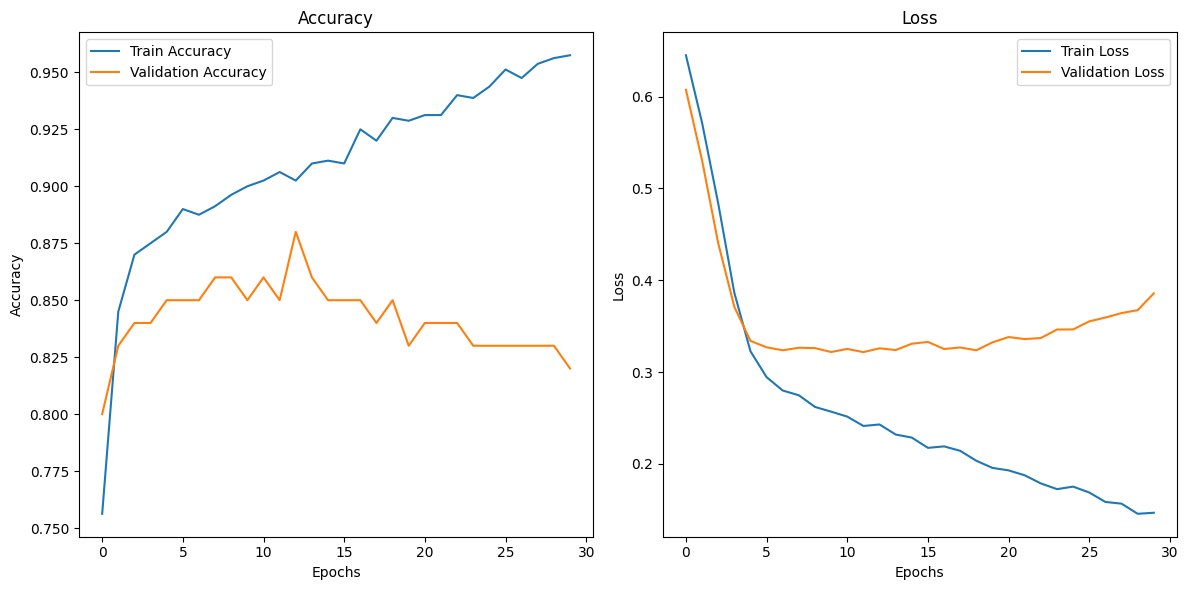

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(42)

# here we generate a synthetic dataset using sklearn - don't worry, you don't need to know it for the exam
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# make sure our data is stored as torch tensors
X_train, X_val, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_val, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_val, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)

# use torch Dataloader for easy batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# define a simple network
class SimpleModel(nn.Module):
    def __init__(self, dropout_rate=0.0, weight_decay=0.0):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(dropout_rate) #dropout is already defined with 0% as default
        self.weight_decay = weight_decay #same for weight decay

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#train and evaluate
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, test_loader, num_epochs=20):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # train
        model.train() #TODO: Why do we need to turn on the training mode?
        """
        necessary for layers like dropout to function correctly during training by randomly disabling neurons to prevent overfitting
        """

        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total_train += target.size(0)
            correct_train += (predicted == target).sum().item()

        # validation
        model.eval() #TODO: Why do we need to change the mode for validation?
        """
        disables dropout and ensures the model uses all neurons when making predictions during validation and testing
        """

        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                _, predicted = torch.max(output, 1)
                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()

        # calculate accuracies - we've got a classifier, that's why we're working with accuracies and not perplexity
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

    # testing loss of the trained model
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total_test += target.size(0)
            correct_test += (predicted == target).sum().item()

    test_accuracy = correct_test / total_test
    print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")

    return train_accuracies, val_accuracies, train_losses, val_losses

# initializations
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=model.weight_decay)
criterion = nn.CrossEntropyLoss()
train_accuracies, val_accuracies, train_losses, val_losses = train_and_evaluate(
    model, optimizer, criterion, train_loader, val_loader, test_loader, num_epochs=30
)

# here we visualize the data to make interpretation easier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()




2. Run the code and have a look at the output. Can you identify any problems in the training process? Can you explain the reason?
  - training accuracy keeps improving over epochs, but the validation accuracy starts declining after around epoch 10-15 --> Overfitting
  - validation accuracy and loss show high variability --> training process may be unstable
  - does not seem to have fully converged, as the validation accuracy is still increasing and the validation loss is still decreasing

  - model may be too complex for the amount of training data available, leading to overfitting --> more regularization (e.g., increasing dropout rate, weight decay) or using a simpler model
  - Experimenting with different optimizers, learning rate schedules, or batch sizes could help stabilize the training.
  - Increasing the number of epochs or obtaining more training data could help

3. Copy the code above and paste it in the cell below. Initialize the model with the following values:
    - dropout = 0.5
    - weight decay = 1e-5

 Run the code.





Epoch 1/30 - Train Loss: 0.6643, Train Accuracy: 0.6138, Val Loss: 0.6330, Val Accuracy: 0.7900
Epoch 2/30 - Train Loss: 0.6258, Train Accuracy: 0.6750, Val Loss: 0.5931, Val Accuracy: 0.8300
Epoch 3/30 - Train Loss: 0.5880, Train Accuracy: 0.7212, Val Loss: 0.5420, Val Accuracy: 0.8400
Epoch 4/30 - Train Loss: 0.5406, Train Accuracy: 0.7775, Val Loss: 0.4814, Val Accuracy: 0.8300
Epoch 5/30 - Train Loss: 0.4751, Train Accuracy: 0.8063, Val Loss: 0.4249, Val Accuracy: 0.8200
Epoch 6/30 - Train Loss: 0.4487, Train Accuracy: 0.8063, Val Loss: 0.3792, Val Accuracy: 0.8500
Epoch 7/30 - Train Loss: 0.4125, Train Accuracy: 0.8225, Val Loss: 0.3563, Val Accuracy: 0.8600
Epoch 8/30 - Train Loss: 0.3796, Train Accuracy: 0.8550, Val Loss: 0.3417, Val Accuracy: 0.8400
Epoch 9/30 - Train Loss: 0.3655, Train Accuracy: 0.8512, Val Loss: 0.3316, Val Accuracy: 0.8600
Epoch 10/30 - Train Loss: 0.3704, Train Accuracy: 0.8650, Val Loss: 0.3296, Val Accuracy: 0.8500
Epoch 11/30 - Train Loss: 0.3513, Train

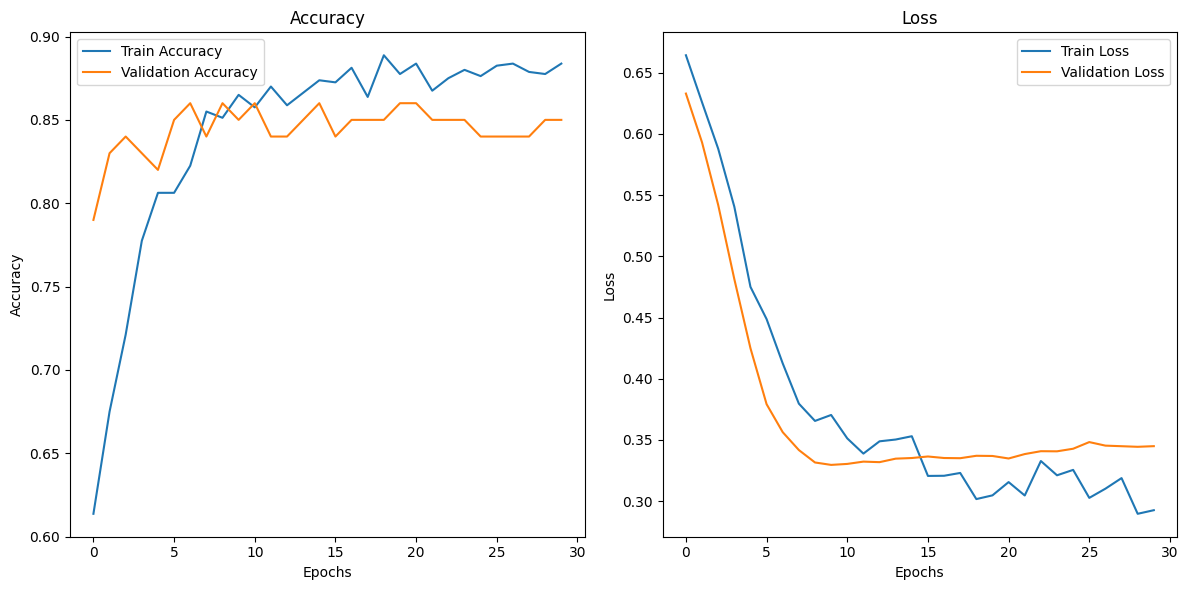

In [ ]:
# your adapted code for 2.3

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(42)

# here we generate a synthetic dataset using sklearn - don't worry, you don't need to know it for the exam
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# make sure our data is stored as torch tensors
X_train, X_val, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_val, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_val, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)

# use torch Dataloader for easy batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# define a simple network
class SimpleModel(nn.Module):
    def __init__(self, dropout_rate=0.5, weight_decay=1e-5):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(dropout_rate) #dropout is already defined with 0% as default
        self.weight_decay = weight_decay #same for weight decay

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#train and evaluate
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, test_loader, num_epochs=20):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # train
        model.train() #TODO: Why do we need to turn on the training mode?
        """
        necessary for layers like dropout to function correctly during training by randomly disabling neurons to prevent overfitting
        """

        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total_train += target.size(0)
            correct_train += (predicted == target).sum().item()

        # validation
        model.eval() #TODO: Why do we need to change the mode for validation?
        """
        disables dropout and ensures the model uses all neurons when making predictions during validation and testing
        """

        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                _, predicted = torch.max(output, 1)
                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()

        # calculate accuracies - we've got a classifier, that's why we're working with accuracies and not perplexity
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

    # testing loss of the trained model
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total_test += target.size(0)
            correct_test += (predicted == target).sum().item()

    test_accuracy = correct_test / total_test
    print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")

    return train_accuracies, val_accuracies, train_losses, val_losses

# initializations
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=model.weight_decay)
criterion = nn.CrossEntropyLoss()
train_accuracies, val_accuracies, train_losses, val_losses = train_and_evaluate(
    model, optimizer, criterion, train_loader, val_loader, test_loader, num_epochs=30
)

# here we visualize the data to make interpretation easier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


4. Is there an improvement? Explain.
The changes have:
  - Increased regularization (dropout, weight decay) has helped reduce overfitting
  - Stabilized the training process and reduced performance volatility
  - Allowed the model to continue improving over the 30 epochs

5. Are there any other improvements that could be made to the model or the training process? If so, what would you experiment with? Motivate your answer.
  - different activation functions
  - different learning rates or optimizers
  - more training data

6. Implement at least one of the changes you suggested in the previous task. Do you see an improvement? (NOTE: don't worry if you don't - this part is about experimenting and having fun!)
  - more stable and better-performing model compared to the first. The training and validation metrics are less volatile and better aligned between the train and validation

Epoch 1/30 - Train Loss: 0.7095, Train Accuracy: 0.5200, Val Loss: 0.6853, Val Accuracy: 0.4700
Epoch 2/30 - Train Loss: 0.7070, Train Accuracy: 0.5250, Val Loss: 0.6844, Val Accuracy: 0.4700
Epoch 3/30 - Train Loss: 0.7026, Train Accuracy: 0.5325, Val Loss: 0.6741, Val Accuracy: 0.7200
Epoch 4/30 - Train Loss: 0.6839, Train Accuracy: 0.5437, Val Loss: 0.6696, Val Accuracy: 0.6700
Epoch 5/30 - Train Loss: 0.6838, Train Accuracy: 0.5487, Val Loss: 0.6625, Val Accuracy: 0.6900
Epoch 6/30 - Train Loss: 0.6741, Train Accuracy: 0.5950, Val Loss: 0.6524, Val Accuracy: 0.8200
Epoch 7/30 - Train Loss: 0.6668, Train Accuracy: 0.6000, Val Loss: 0.6434, Val Accuracy: 0.8000
Epoch 8/30 - Train Loss: 0.6617, Train Accuracy: 0.5787, Val Loss: 0.6327, Val Accuracy: 0.8000
Epoch 9/30 - Train Loss: 0.6377, Train Accuracy: 0.6438, Val Loss: 0.6168, Val Accuracy: 0.8600
Epoch 10/30 - Train Loss: 0.6311, Train Accuracy: 0.6512, Val Loss: 0.6016, Val Accuracy: 0.8200
Epoch 11/30 - Train Loss: 0.6140, Train

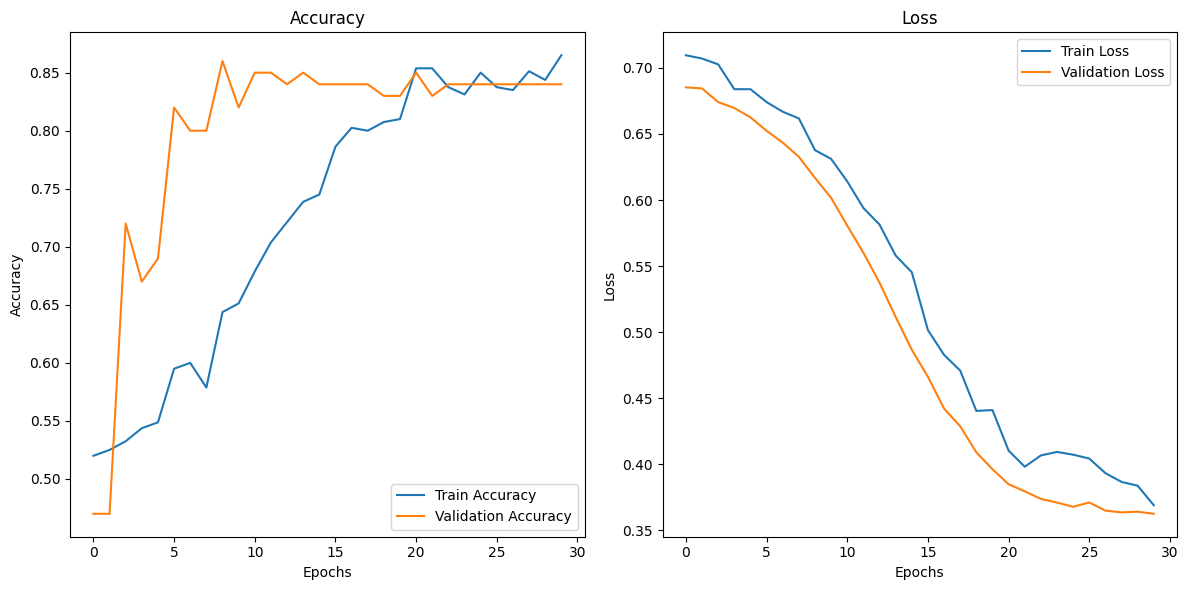

In [ ]:
# adapted code for task 2.6
# I used sigmoid instead of ReLU

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(42)

# here we generate a synthetic dataset using sklearn - don't worry, you don't need to know it for the exam
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# make sure our data is stored as torch tensors
X_train, X_val, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_val, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_val, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)

# use torch Dataloader for easy batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# define a simple network
class SimpleModel(nn.Module):
    def __init__(self, dropout_rate=0.5, weight_decay=1e-5):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(dropout_rate) #dropout is already defined with 0% as default
        self.weight_decay = weight_decay #same for weight decay

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#train and evaluate
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, test_loader, num_epochs=20):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # train
        model.train() #TODO: Why do we need to turn on the training mode?
        """
        necessary for layers like dropout to function correctly during training by randomly disabling neurons to prevent overfitting
        """

        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total_train += target.size(0)
            correct_train += (predicted == target).sum().item()

        # validation
        model.eval() #TODO: Why do we need to change the mode for validation?
        """
        disables dropout and ensures the model uses all neurons when making predictions during validation and testing
        """

        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                _, predicted = torch.max(output, 1)
                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()

        # calculate accuracies - we've got a classifier, that's why we're working with accuracies and not perplexity
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

    # testing loss of the trained model
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total_test += target.size(0)
            correct_test += (predicted == target).sum().item()

    test_accuracy = correct_test / total_test
    print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")

    return train_accuracies, val_accuracies, train_losses, val_losses

# initializations
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=model.weight_decay)
criterion = nn.CrossEntropyLoss()
train_accuracies, val_accuracies, train_losses, val_losses = train_and_evaluate(
    model, optimizer, criterion, train_loader, val_loader, test_loader, num_epochs=30
)

# here we visualize the data to make interpretation easier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# Task 3 RNN

**Please solve the exercise manually. If you use Python you MUST print out the required variables.**

Given a standard RNN with sequence x of 3 inputs, each with feature dimension of 2. The hidden layers have three dimensions. The activation function g is tanh. All weights in matrices are 0.5. The output at each time step should be a probability distribution over 4 classes.

$$x = [[-6,2], [2,-2], [5,-8]]$$

$${x_1} = [-6,2], {x_2} = [2,-2], {x_3} = [5,-8]$$

$${h_t} = g(\mathbf{U}{h_t}{_-}{_1} +\mathbf{W}{x_t}+b)$$

$${y_t} = f(\mathbf{V}{h_t})$$

a) Which function would you use as activation function f? Why?

  - I would use tanh because it can squash values between -1 and 1, making it suitable for dealing with recurrent neural network hidden states

b) Specify the weight matrices **U**, **W** and **V**
 - U: 3x2 Matrix: all values are 0.5
 - W: 3x3 Matrix: all values are 0.5
 - V: 4x3 Matrix: all values are 0.5

c) Given b is 2, calculate h2
  - h1 = tanh(Uh0 + Wx1 + 2)
    - = tanh([0, 0, 0] + [-2, -2, -2] + [2, 2, 2])
    - = tanh([0, 0, 0]) = [0, 0, 0]
  - h2 = tanh(Uh1 + Wx2 + 2)
    - = tanh([0, 0, 0] + [0, 0, 0] + [2, 2, 2])
    - = [0.964, 0.964, 0.964]

d) Calculate y2
  - y2 = softmax(Vh2)
    - = softmax(0.5 * ones(4, 3)⋅[0.964, 0.964, 0.964])
    - = softmax([1.446, 1.446, 1.446, 1.446])
    - = [0.25, 0.25, 0.25, 0.25]

In [ ]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

U = np.full((3, 3), 0.5)
W = np.full((3, 2), 0.5)
V = np.full((4, 3), 0.5)

b = 2
x = np.array([[-6, 2], [2, -2], [5, -8]])
h = np.zeros((3,))

h1 = tanh(np.dot(U, h) + np.dot(W, x[0]) + b)
h2 = tanh(np.dot(U, h1) + np.dot(W, x[1]) + b)
y2 = softmax(np.dot(V, h2))

print("h1:", h1)
print("h2:", h2)
print("y2:", y2)

h1: [0. 0. 0.]
h2: [0.96402758 0.96402758 0.96402758]
y2: [0.25 0.25 0.25 0.25]


# Task 4: encoder/decoder
**!!Do not change any of the existing code or predefined variables!!**

**!!The TODOs mark the place where your need to add your own code!!**

Given a standard RNN as encoder, and given a standard RNN as decoder, complete the following tasks:

- a: Code completion task:
 specifiy the encoder and decoder to have 4 hidden states and a feature dimension of 2

- b: Answer: which activation function is used for the encoder and decoder RNN in the code below? (Hint: try to find the corresponding documentation.)
  - it uses tanh

- c: Code completion task:
implement the training procedure where the last hidden state of the encoder is the initial hidden state of the decoder. (Hint: what are the results you get from each step? Which one is used? You can also look at corresponding documentation for help.)

Use the following x as input sequence: x=[[[0.5,0.2],[0.1,0.2]]] and apply the procedure in a single step. (Already given)


In [ ]:
# you need import this
import random

In [ ]:
SEED = 42

random.seed(SEED)
torch.manual_seed(SEED)

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)

    def forward(self, x):
        output, hidden = self.rnn(x)
        return output, hidden

class Decoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.linear = nn.Linear(hidden_size, input_size)

    def forward(self, x, h):
        output, hidden = self.rnn(x, h.unsqueeze(0))

        output = self.linear(output)
        return output

In [ ]:
# Define the input
input_sequence = torch.tensor([[[0.5, 0.2], [0.1, 0.2]]], dtype=torch.float32)
#TODO: define the parameters
hidden_size = 4
feature_dim = 2

# TODO: Initialize encoder and decoder
encoder = Encoder(feature_dim, hidden_size)
decoder = Decoder(feature_dim, hidden_size)

epoch = 1
for _ in range(epoch):
  # TODO: Get the last hidden state from the encoder
  encoder_output, encoder_hidden = encoder(input_sequence)
  print(encoder_output)

  # TODO: Use the last hidden state from the encoder as the initial hidden state for the decoder
  encoder_hidden_state = encoder_hidden[-1]
  decoder_output = decoder(input_sequence, encoder_hidden_state)

  print(decoder_output)

tensor([[[-0.0732, -0.5987,  0.2690, -0.6575],
         [ 0.0164, -0.5374,  0.1002, -0.7220]]], grad_fn=<TransposeBackward1>)
tensor([[[ 1.0491, -0.1733],
         [ 0.9043, -0.3265]]], grad_fn=<ViewBackward0>)
